#  Budget Vs Earnings

Import libraries required for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the CSV files and combine the two files.

In [2]:
# Read the datasets
df1 = pd.read_csv("./data/tngross.csv")
df2 = pd.read_csv("./data/tnproduction.csv")
movie_data = df1.merge(df2, on= "Unnamed: 0")

Review the data to find the data needed for analysis.

In [3]:
movie_data

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564",181 minutes,Action,Marvel Studios,United States
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",136 minutes,Adventure,Walt Disney Pictures,United States
2,2,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979",141 minutes,Action,Marvel Studios,United States
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817",136 minutes,Adventure,"Lucasfilm, Bad Robot",United States
4,4,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,044,540,523",156 minutes,Action,Marvel Studios,United States
...,...,...,...,...,...,...,...,...,...,...
6095,6095,"Mar 17, 2015",Closure,"$100,000",$0,$0,90 minutes,Drama,None,United States
6096,6096,"Aug 29, 2015",Lunch Time Heroes,"$100,000",$0,$0,88 minutes,Adventure,Phebean Films,Nigeria
6097,6097,"Mar 25, 2015",Open Secret,"$100,000",$0,$0,None,Documentary,None,United States
6098,6098,"Nov 10, 2015",The Night Visitor,"$100,000",$0,$0,None,Horror,None,United States


Selecting columns needed for analysis.

In [4]:
# Choosing relevant columns for analysis
movie_cash_flow = movie_data[['release_date',"movie","production_budget", "worldwide_gross","domestic_gross"]]
movie_cash_flow

,release_date,movie,production_budget,worldwide_gross,domestic_gross
0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$2,797,800,564","$858,373,000"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$1,045,713,802","$241,071,802"
2,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$1,395,316,979","$459,005,868"
3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$2,064,615,817","$936,662,225"
4,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$2,044,540,523","$678,815,482"
...,...,...,...,...,...
6095,"Mar 17, 2015",Closure,"$100,000",$0,$0
6096,"Aug 29, 2015",Lunch Time Heroes,"$100,000",$0,$0
6097,"Mar 25, 2015",Open Secret,"$100,000",$0,$0
6098,"Nov 10, 2015",The Night Visitor,"$100,000",$0,$0


Removing the "$" and "," from the cash flows, then converting the string to an int.

In [5]:
# Create a function to change the format of the dollar amount values

def dollar_to_int(column):
    return column.str.replace('$', '').str.replace(',', '').map(int)

movie_cash_flow[['production_budget', 'domestic_gross', 'worldwide_gross']] = movie_cash_flow[['production_budget', 'domestic_gross', 'worldwide_gross']].apply(dollar_to_int)

C:\Users\Owner\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Dropping the rows with 0 values from worldwide gross due to missing data.

In [6]:
#Dropping rows with 0 values in worldwide_gross
movie_cash_flow = movie_cash_flow[~(movie_cash_flow['worldwide_gross']==0)]
movie_cash_flow

,release_date,movie,production_budget,worldwide_gross,domestic_gross
0,"Apr 23, 2019",Avengers: Endgame,400000000,2797800564,858373000
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,241071802
2,"Apr 22, 2015",Avengers: Age of Ultron,365000000,1395316979,459005868
3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,2064615817,936662225
4,"Apr 25, 2018",Avengers: Infinity War,300000000,2044540523,678815482
...,...,...,...,...,...
6087,"May 10, 1980",Penitentiary,100000,287000,287000
6088,"Feb 6, 2004",The Lost Skeleton of Cadavra,100000,110536,110536
6089,"Mar 21, 2014",Cheap Thrills,100000,59424,59424
6090,"Jun 19, 2014",The Past is a Grotesque Animal,100000,20056,20056


Creating 2 columns to show profit and rate of return for analysis.

In [7]:
#Creating 2 columns to show profit and rate of return
movie_cash_flow['earnings'] = movie_cash_flow["worldwide_gross"] - movie_cash_flow["production_budget"]
movie_cash_flow["ROR"] = movie_cash_flow["worldwide_gross"] / movie_cash_flow["production_budget"]
movie_cash_flow

C:\Users\Owner\AppData\Local\Temp/ipykernel_26388/193602288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cash_flow['earnings'] = movie_cash_flow["worldwide_gross"] - movie_cash_flow["production_budget"]
C:\Users\Owner\AppData\Local\Temp/ipykernel_26388/193602288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cash_flow["ROR"] = movie_cash_flow["worldwide_gross"] / movie_cash_flow["production_budget"]


,release_date,movie,production_budget,worldwide_gross,domestic_gross,earnings,ROR
0,"Apr 23, 2019",Avengers: Endgame,400000000,2797800564,858373000,2397800564,6.994501
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,241071802,666713802,2.759139
2,"Apr 22, 2015",Avengers: Age of Ultron,365000000,1395316979,459005868,1030316979,3.822786
3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,2064615817,936662225,1758615817,6.747111
4,"Apr 25, 2018",Avengers: Infinity War,300000000,2044540523,678815482,1744540523,6.815135
...,...,...,...,...,...,...,...
6087,"May 10, 1980",Penitentiary,100000,287000,287000,187000,2.870000
6088,"Feb 6, 2004",The Lost Skeleton of Cadavra,100000,110536,110536,10536,1.105360
6089,"Mar 21, 2014",Cheap Thrills,100000,59424,59424,-40576,0.594240
6090,"Jun 19, 2014",The Past is a Grotesque Animal,100000,20056,20056,-79944,0.200560


Checking the mean and median for production budget.

In [8]:
budget_mean= movie_cash_flow["production_budget"].mean()
budget_mean

33522829.320689056

In [9]:
budget_median = movie_cash_flow["production_budget"].median()
budget_median

19000000.0

Creating and verifying data for movies based on profits and losses.

In [10]:
#Creating new variable to show movies that made a profit 
movie_cash_flow_earners = movie_cash_flow[movie_cash_flow["earnings"] > 0]

In [11]:
#Creating new variable to show movies that lost money 
movie_cash_flow_losers= movie_cash_flow[movie_cash_flow["earnings"] < 0]

In [12]:
movie_cash_flow_earners.count()

release_date         3856
movie                3856
production_budget    3856
worldwide_gross      3856
domestic_gross       3856
earnings             3856
ROR                  3856
dtype: int64

In [13]:
movie_cash_flow_losers.count()

release_date         1891
movie                1891
production_budget    1891
worldwide_gross      1891
domestic_gross       1891
earnings             1891
ROR                  1891
dtype: int64

In [14]:
movie_cash_flow_earners.describe()

,production_budget,worldwide_gross,domestic_gross,earnings,ROR
count,3.856000e+03,3.856000e+03,3.856000e+03,3.856000e+03,3856.000000
mean,3.870803e+07,1.408194e+08,6.259147e+07,1.021113e+08,6.365357
std,4.781894e+07,2.120493e+08,7.972933e+07,1.780471e+08,19.431269
min,1.000000e+05,1.105360e+05,0.000000e+00,3.490000e+02,1.000265
25%,7.302312e+06,2.572221e+07,1.439897e+07,1.166599e+07,1.845539
50%,2.000000e+07,6.678871e+07,3.779982e+07,3.773796e+07,3.036008
75%,5.000000e+07,1.650622e+08,7.867170e+07,1.128988e+08,5.371822
max,4.000000e+08,2.845900e+09,9.366622e+08,2.608900e+09,498.750000


In [15]:
movie_cash_flow_losers.describe()

,production_budget,worldwide_gross,domestic_gross,earnings,ROR
count,1.891000e+03,1.891000e+03,1.891000e+03,1.891000e+03,1891.000000
mean,2.294951e+07,1.192132e+07,7.444567e+06,-1.102819e+07,0.394904
std,2.633240e+07,1.974767e+07,1.160390e+07,1.395561e+07,0.316497
min,1.000000e+05,1.700000e+01,0.000000e+00,-1.580898e+08,0.000002
25%,5.000000e+06,4.249695e+05,1.008015e+05,-1.430586e+07,0.089645
50%,1.500000e+07,4.199334e+06,1.900451e+06,-6.554621e+06,0.341238
75%,3.000000e+07,1.480667e+07,1.066245e+07,-2.092399e+06,0.675014
max,2.000000e+08,1.741313e+08,1.002897e+08,-7.580000e+02,0.998889


In [16]:
#Looking at the correlation between the budget and profits/losses
losers = movie_cash_flow_losers['production_budget'].corr(movie_cash_flow_losers['earnings'])
winners = movie_cash_flow_earners['production_budget'].corr(movie_cash_flow_earners['earnings'])
print(f'The correlation between budget and loses is {losers}.')
print(f'The correlation between budget and loses is {winners}.')

The correlation between budget and loses is -0.6778293629215489.
The correlation between budget and loses is 0.644671386018779.


In [17]:
movie_cash_flow.describe()

,production_budget,worldwide_gross,domestic_gross,earnings,ROR
count,5.747000e+03,5.747000e+03,5.747000e+03,5.747000e+03,5747.000000
mean,3.352283e+07,9.840660e+07,4.444587e+07,6.488377e+07,4.400831
std,4.262659e+07,1.842933e+08,7.057323e+07,1.554306e+08,16.162276
min,1.000000e+05,1.700000e+01,0.000000e+00,-1.580898e+08,0.000002
25%,6.400000e+06,7.113001e+06,3.074324e+06,-1.987679e+06,0.692488
50%,1.900000e+07,3.301380e+07,1.987057e+07,1.197129e+07,1.863649
75%,4.200000e+07,1.038857e+08,5.500460e+07,6.708668e+07,3.926888
max,4.000000e+08,2.845900e+09,9.366622e+08,2.608900e+09,498.750000


In [18]:
movie_cash_flow.median()

production_budget    1.900000e+07
worldwide_gross      3.301380e+07
domestic_gross       1.987057e+07
earnings             1.197129e+07
ROR                  1.863649e+00
dtype: float64

Setting variables to their respective columns to make the analysis easier. 

In [19]:
#Creating variables for graph
production_budget = movie_cash_flow["production_budget"]
domestic_gross = movie_cash_flow["domestic_gross"]
world_wide_gross = movie_cash_flow["worldwide_gross"]
earnings = world_wide_gross - production_budget

Showing the correlation between the production budget and the earnings world wide. 

In [20]:
#Checking correlation between world wide gross and production budget
world_wide_correlation = production_budget.corr(world_wide_gross)
world_wide_correlation

0.7397328675728562

Plotting the data.

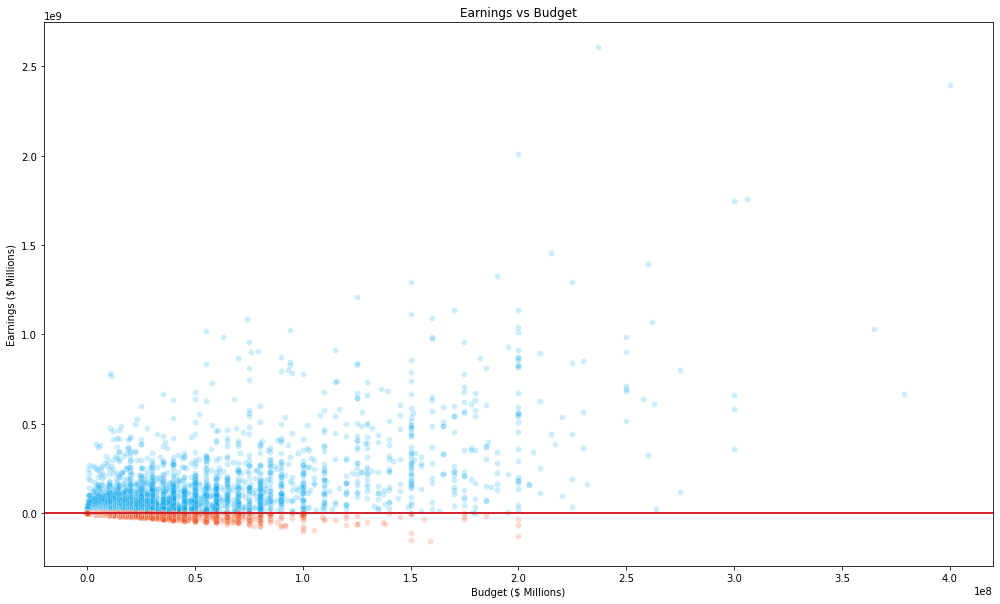

In [21]:
#Creating a graph to represent the data
fig, ax = plt.subplots(figsize = (15,10))

graph1 = sns.scatterplot(
    x=movie_cash_flow_earners['production_budget'], 
    y= movie_cash_flow_earners["earnings"],
    color='#01A6F0', alpha= .2)
graph2 = sns.scatterplot(
    x=movie_cash_flow_losers['production_budget'], 
    y= movie_cash_flow_losers["earnings"], 
    color='#F34F1C', alpha= .2)
graph1.axhline(1)
plt.xlabel('Budget ($ Millions)')
plt.ylabel('Earnings ($ Millions)')
plt.title('Earnings vs Budget')
ax.axhline(y=1, color= "red")
fig.set_size_inches(17,10)
plt.show()